In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df = pd.read_csv("csv_files/Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Data Wrangling/cleaning

In [3]:
df.shape

(13320, 9)

In [4]:
# aggregate the dataset
df.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

#### Drop some less important columns
Coz they dont play a big part in determining the final price of the property

In [5]:
df2 = df.drop(["area_type","availability","society","balcony"], axis=1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df2.shape

(13320, 5)

### Data wrangling process

In [7]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
# Drop the null values coz the dataset is big enough. Dropping them aint a big issue
df3 = df2.dropna()
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df3.shape

(13246, 5)

In [10]:
df3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

##### Handle the size eg BHK, bedroom,... as all these mean one thing

In [11]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
# create a new column to store the numbers,
# our x is now b a string containing values of size column. separate the str and return the first part and store it as an int
df3["bhk"] = df3["size"].apply(lambda x: int(x.split(" ")[0]))
df3.head()

/tmp/ipykernel_3801/1095950091.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["bhk"] = df3["size"].apply(lambda x: int(x.split(" ")[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
# explore this column
df3["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [14]:
# A home may not have 43 bedrooms
# Check to see if it is an outlier
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


A property of 43 bedrooms with 24 total_sqft is an error. The size is small for that number

##### Lets now explore the total_sqft feature

In [15]:
df3["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

We can see some range variations in the dataset, eg '1133 - 1384' </br>
define a function to determine if any values in the total_sqft are floats or not

In [16]:
# convert the values to floats but if its not a valid value eg '1133 - 1384', retun false in the except part
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
# ~ (negate function) will return the range values ( ie not a valid float number)
df3[~df3["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


##### This is a big issue in the dataset where the data is not uniform, is unstructured, contains outliers, etc </br>
To solve this, take average for any rage numbers and ignore values like 34.46Sq. Meter, 4125Perch...(though can do unit conversion ie to sqr_ft)

In [18]:
# Write a function that takes in input string, split it with(-), if the tokens are two, convert the individual tokens 
# into number and do mean,
# else ( if it is a normal number), convert to float
def convert_sqft(x):
    tokens = x.split("-")
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [19]:
# test the function
convert_sqft("34.46Sq. Meter")

In [20]:
convert_sqft("2100 - 2850")

2475.0

In [21]:
convert_sqft("4343")

4343.0

##### Apply the function to df3

In [22]:
# create a deep copy of df3
df4 = df3.copy()
df4["total_sqft"] = df4["total_sqft"].apply(convert_sqft)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [23]:
df3.loc[30]

location        Yelahanka
size                4 BHK
total_sqft    2100 - 2850
bath                  4.0
price               186.0
bhk                     4
Name: 30, dtype: object

In [24]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

## Feature engineering and Dimensional reduction

In [25]:
# do a deep copy of df4 and create price per square feet column
# price is in lkr convert it by *100000
df5 = df4.copy()
df5["price_per_sqft"] = (df5["price"]*100000)/df5["total_sqft"]
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


#### Explore the locations column

In [26]:
# check how many locations
len(df5['location'].unique())

1304

This is a dimensionarity problem (1304) records. To solve this we use OneHotEncoding.

In [27]:
# check how many data points are available for location
# strip first any spaces from the datapoints eg remove leading space,,
df5["location"] = df5["location"].apply(lambda x: x.strip())
# create a variable to group df by location and aggregate the result
# count returns number of appearances
# sort by number of datapoints
location_stats = df5.groupby("location")["location"].agg("count").sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [28]:
# find out how many locations have less than 20 datapoints
len(location_stats[location_stats<=10])

1052

Lets use this to qualify location as other location

In [29]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [30]:
# first see how many unique locations
len(df5.location.unique())

1293

In [31]:
# transform the df, take location values to 'other' if its in location_stats_less_than_10 esle keep the location values
df5["location"] = df5["location"].apply(lambda x: "other" if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [32]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


notice that we have "other" record created

## Outlier detection and removal
outliers represent extreme variations in the dataset. eg consider a scenario like here; 1056.0 sqft with 2 bedrooms at location[0] </br>
eg a bedroom could me around 300 sqft

In [33]:
# eg if you have 600 sqft with 6 bedrooms. its unusual
600/6

100.0

In [34]:
# suppose a bedroom is 300 sqft. return all bedrooms less that 300 sqft
df5[(df5.total_sqft/df5.bhk)<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [35]:
df5.shape

(13246, 7)

In [36]:
# negate all these ouliers to sort them
df6 = df5[~((df5.total_sqft/df5.bhk)<300)]
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [37]:
df6.shape

(12502, 7)

Notice that these outliers were removed (13246, 7) vs (12502, 7)

##### explore price_per_sqft column

In [38]:
# return basic statistics on this column
df6["price_per_sqft"].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Notice that its rare to find property at 267.829813. Its likely to get property at 176470.588235 in some luxurious area </br>
But thes are treated as anomalies

In [39]:
# take df as input and groupby location
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    # for subdf, calculate mean and std
    for key, subdf in df.groupby("location"):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [40]:
# call this function on df6
df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

we have successfully removed outliers (10241, 7) vs (12502, 7)

Lets do a scatter plot to visualize our data. eg we could have 2 properties in same location with different price_per_sqft eg "Rajaji Nagar"

##### define a function to detect outliers

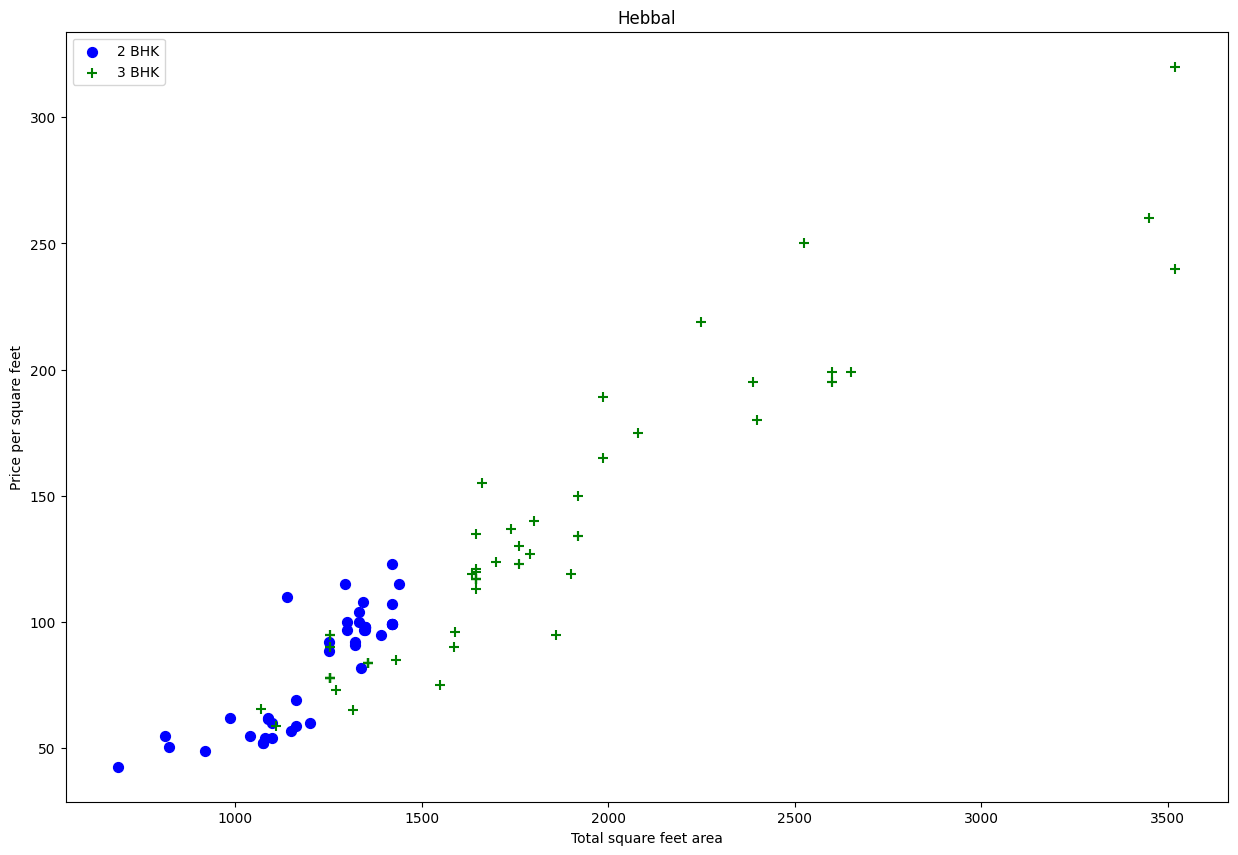

In [41]:
# define a function to detect outliers
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk==2)]
    bhk3 = df[(df.location == location) & (df.bhk==3)]
    matplotlib.rcParams["figure.figsize"] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price, color="blue",label="2 BHK",s =50)
    plt.scatter(bhk3.total_sqft,bhk3.price, color="green",marker="+",label="3 BHK",s =50)
    plt.xlabel("Total square feet area")
    plt.ylabel("Price per square feet")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7,"Hebbal")

we can see (for Rajaji Nagar) that around 1700 total_sqft, we have a case where price of 2 bedromm property is higher that that of 3 bedrooms. 
we also have cases around 1400 sqft. we need to remove these outliers. </br>
Try for different locations eg Hebbal, many 2 bedroom greater that 3 bedroom properties

##### define a function to remove outliers

In [42]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    # go through every location
    for location, location_df in df.groupby("location"):
        bhk_stats = {}
        # for every location, create another dataframe based on bhk
        for bhk, bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk] = {
                # then compute mean, std and count
                "mean":np.mean(bhk_df.price_per_sqft),
                "std":np.std(bhk_df.price_per_sqft),
                "count":bhk_df.shape[0]
            }
            # then run the lop again excluding the datapoints whose price_per_sqft < mean of previous bhk
        for bhk, bhk_df in location_df.groupby("bhk"):
            stats = bhk_stats.get(bhk-1)
            if stats and stats["count"]>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats["mean"])].index.values)
    return df.drop(exclude_indices,axis="index")

# create df8 and call the function
df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

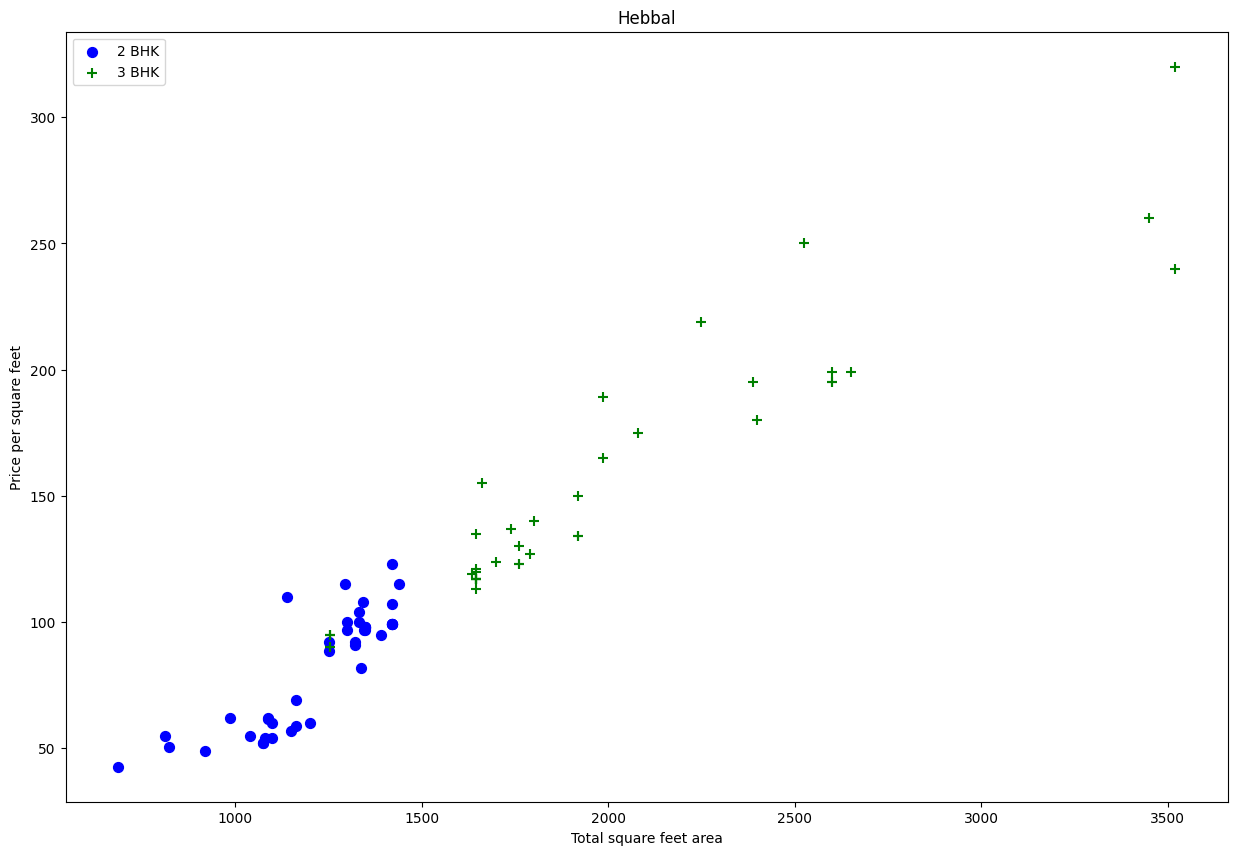

In [43]:
# replot the scatter chart to see the improvement
plot_scatter_chart(df8,"Hebbal")

we can now see that the majority of 3 BHK are above 2 BHK values. Though we still have some abnomalities. its abit ikay now

##### Plot a hist to show apartments (properties) per sqft area

Text(0, 0.5, 'count')

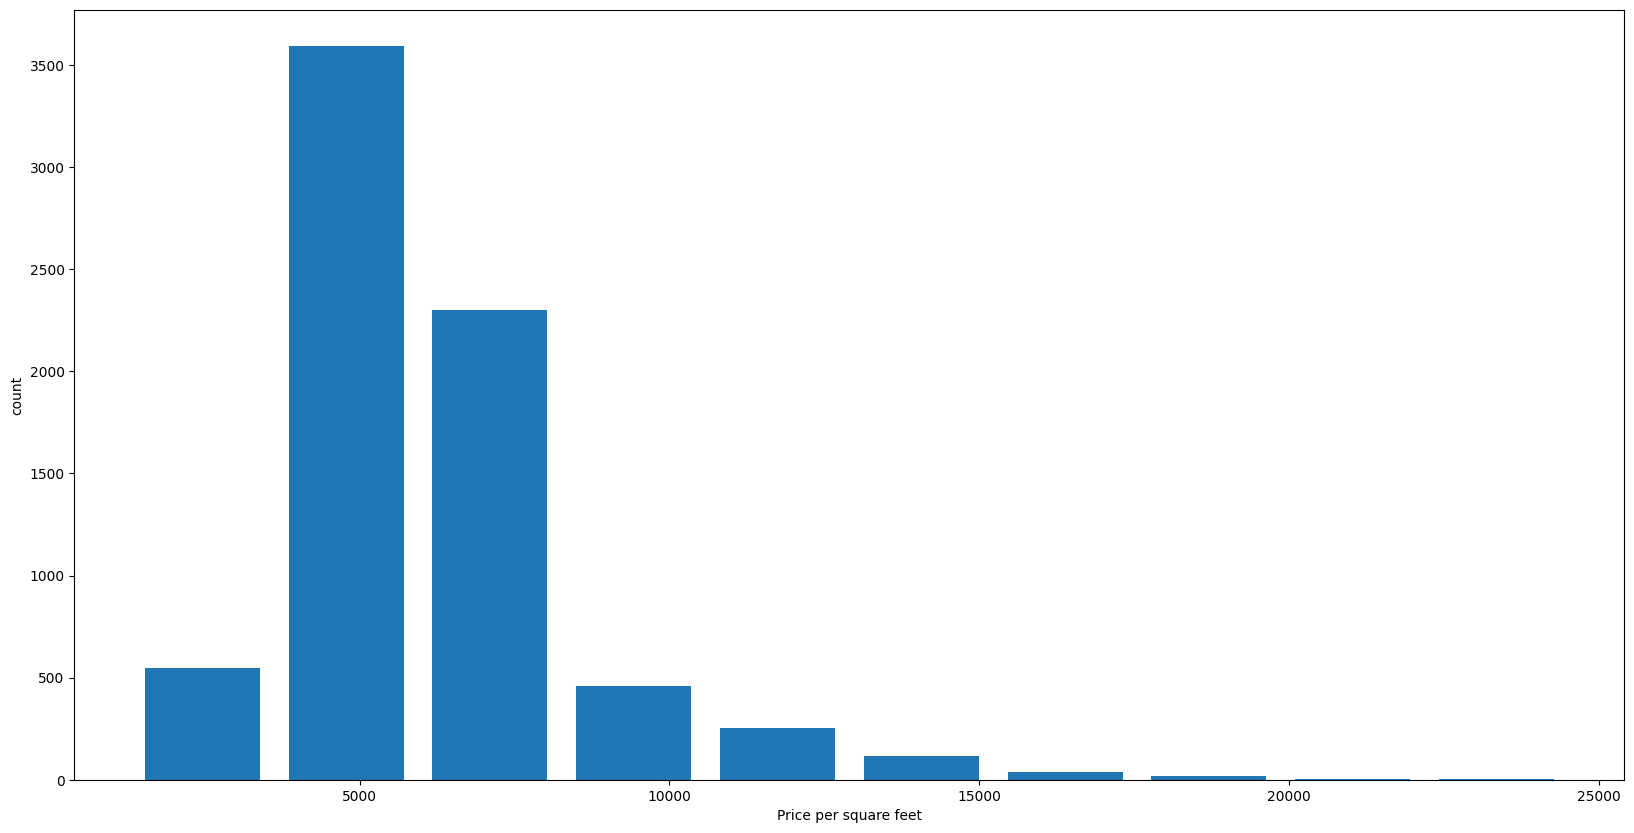

In [44]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price per square feet")
plt.ylabel("count")

the hist shows a normal distribution, is like a bell curve

### Explore the bathroom column (feature)

In [45]:
df8.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [46]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

There are some properties with 13 bathrooms

In [47]:
# properties with bathrooms greater that 10
df8[df8["bath"]>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


its okay to have an apartment with 2 bathrooms more than the bedrooms.
But its unusual to have more that 2 bathrooms greater that the number bedrooms. This is an outlier. we eliminate any properties of this kind

plot a hist to visualize first

Text(0, 0.5, 'count')

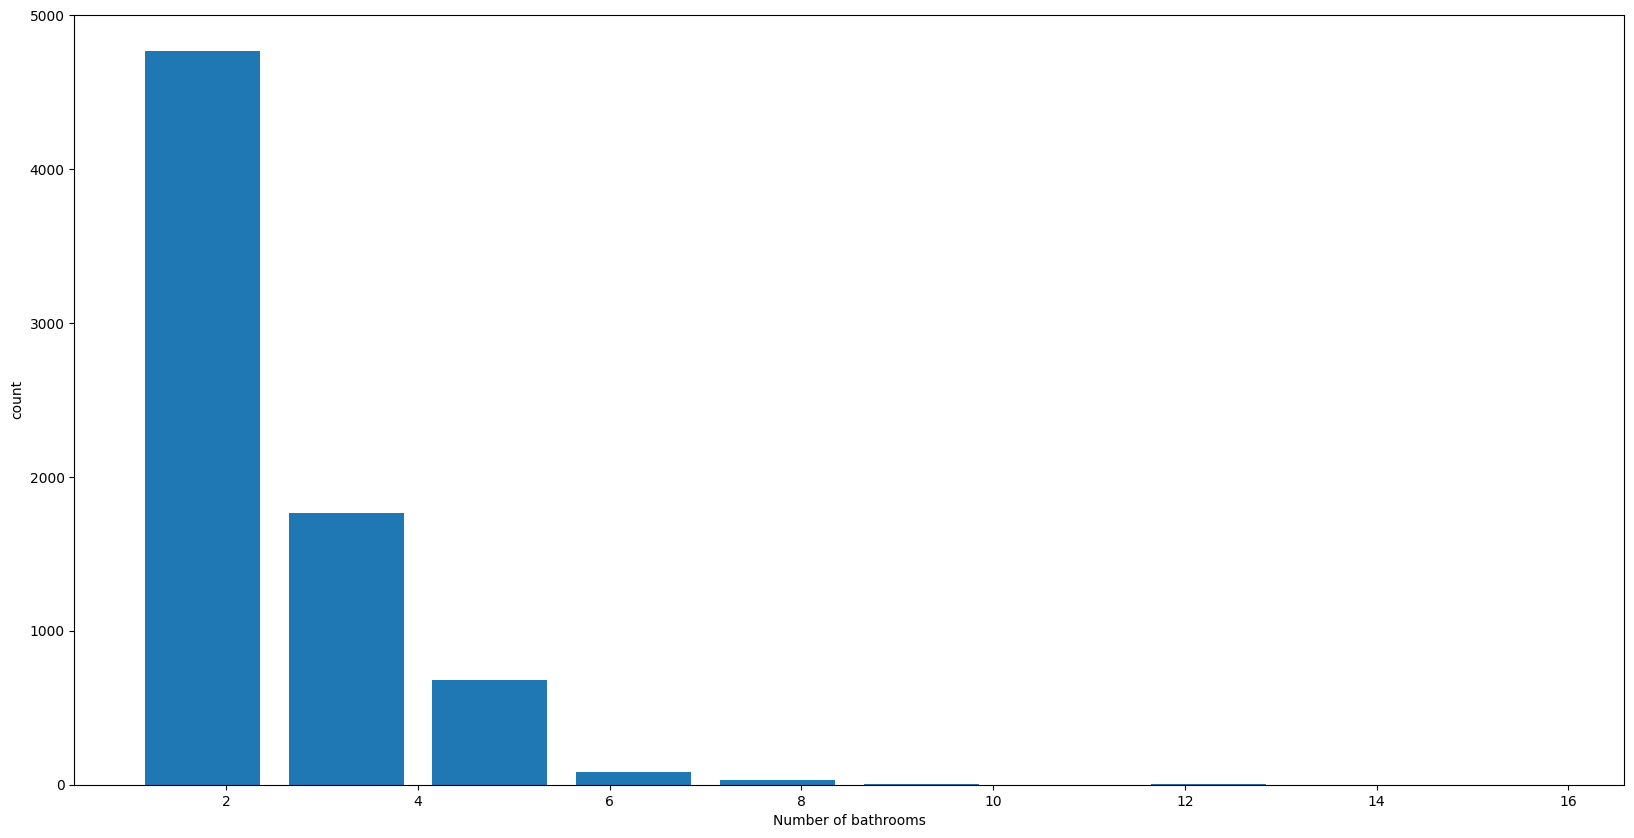

In [48]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("count")

We can see that most properties have 2,4,6 bathrooms. The rest are anomalies

In [49]:
# treat as outliers any bedrooms with bathrooms greater than +2
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [50]:
# remove these outliers now
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

Now out dataset is ready for ML training. But we need to drop some useless feaatures eg price_per_sqft (used only for outlier detection)

In [51]:
df10 = df9.drop(["size","price_per_sqft"],axis=1)
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


# Model building
We will use KFold cross validation and GridSearchCv to come up with the best algorithm as well as best parameters

In [52]:
dummies = pd.get_dummies(df10["location"],dtype="int")
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# concatenate df10 with dummies and drop "other" column
df11 = pd.concat([df10,dummies.drop("other",axis=1)],axis=1)
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# drop the location column
df12 = df11.drop("location",axis=1)
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Model trainig phase

In [55]:
df12.shape

(7251, 245)

In [56]:
# define the independent variables
X = df12.drop("price",axis=1)
# dependent variable
y = df12["price"]

##### train test split

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

##### Train the linearRegression model

In [59]:
from sklearn.linear_model import LinearRegression

In [71]:
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8452277697874291

Lets find the best model for the dataset, try KFold classifier

In [72]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [73]:
# ShuffleSplit makes sure we have equal data sample ditribution
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

Use GridSearchCv to run the model on different regressors and data parameters

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [85]:
# define a dictionary for classifiers and parameter tuning
def find_best_model_using_GridSearchCv(X,y):
    algorithms = {
        "linear_regression": {
            "model": LinearRegression(),
            "params": {
                "positive": [True,False]
            }
        },
        "lasso": {
            "model": Lasso(),
            "params": {
                "alpha":[1,2],
                "selection":["random","cyclic"]
            }
        },
        "decision_tree": {
            "model": DecisionTreeRegressor(),
            "params": {
                "criterion": ["mse","friedman_mse"],
                "splitter": ["random","best"]
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name, config in algorithms.items():
        gs = GridSearchCV(config["model"], config["params"],cv = cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            "model": algo_name,
            "best_score": gs.best_score_,
            "best_params": gs.best_params_
        })
    return pd.DataFrame(scores,columns=["model","best_score","best_params"])

# call the function on x and y
find_best_model_using_GridSearchCv(X,y)

/home/lovis/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/lovis/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lovis/.local/lib/python3.10/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/lovis/.local/lib/python3.10/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/home/lovis/.local/lib/

,model,best_score,best_params
0,linear_regression,0.818354,{'positive': False}
1,lasso,0.687447,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.712263,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


We can see that LinearRegression is the best model. We use that (since its even already trained) to make price predictions

In [86]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [89]:
# check location of some area
np.where(X.columns=="2nd Phase Judicial Layout")[0][0]

5

In [91]:
# write a function for making predictions based on lacation index
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [92]:
# lets make predicton for 1st Phase JP Nagar, 1000 sqft, 2 athrooms and 2 bedrooms
predict_price("1st Phase JP Nagar",1000,2,2)

/home/lovis/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677170528

In [97]:
# lets make predicton for 1st Phase JP Nagar, 1000 sqft, 2 athrooms and 2 bedrooms
# more bhk than bathrooms
predict_price("1st Phase JP Nagar",1000,2,3)

/home/lovis/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.72616900745913

we can see price reduction, this could be due to certain reasons. eg the 2 bedroom house with 2 baths would be bg enough vs 3 bedroom which could be small
plus we dont have enough information

We can see the price is 83 lkr

In [98]:
predict_price("1st Phase JP Nagar",1000,3,3)

/home/lovis/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.80519395197086

lets try high priced places

In [99]:
# same home in Indira Nagar with 3 bedrooms, 3 bathrooms
predict_price("Indira Nagar",1000,2,2)

/home/lovis/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.27815484007007

In [100]:
# same home with 3 bedrooms, 3 bathrooms
predict_price("Indira Nagar",1000,3,3)

/home/lovis/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


184.5843020203357

## Export Model to a picke file

In [104]:
import pickle
with open("csv_files/Bengaluru_Home_prices_model.pickle","wb") as f:
    pickle.dump(model,f)

The saved LinearRegression model is very small coz it does not save the actual data but the coefficients, params,ntercept.

We also need the columns information. We export that information into a Json file

In [107]:
import json
columns = {
    # convert all the columns to lower case coz we have different loc combinations
    "data_columns":[col.lower() for col in X.columns]
}
# dump all the columns into a json fle
with open("csv_files/columns.json","w") as f:
    f.write(json.dumps(columns))

We will the use the pickle and json files in the flusk server(to serve HTTP server requests made from the UI and predict the prices) in later stages